Loaded images: (23708, 64, 64, 3)
Loaded ages: (23708,)
Example ages: [100 100 100 100 100 100 100 100 100 100]
Training samples: 18966
Validation samples: 4742


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - loss: 486.8975 - mae: 16.8802 - val_loss: 282.4335 - val_mae: 12.5664
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 224.9347 - mae: 11.3940 - val_loss: 172.9281 - val_mae: 9.7374
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 179.5890 - mae: 10.1278 - val_loss: 167.2729 - val_mae: 9.3829
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 168.4741 - mae: 9.7515 - val_loss: 159.4031 - val_mae: 9.1597
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 144.3279 - mae: 8.9873 - val_loss: 139.1266 - val_mae: 8.4601
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 132.3433 - mae: 8.6265 - val_loss: 115.8919 - val_mae: 8.0008
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 124.9835 - mae: 8.4075 - val_loss: 113.7741 - val_mae: 7.8470
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 118.3597 - mae: 8.1297 - val_loss: 106.3716 - val_mae: 7.4880
Epoc

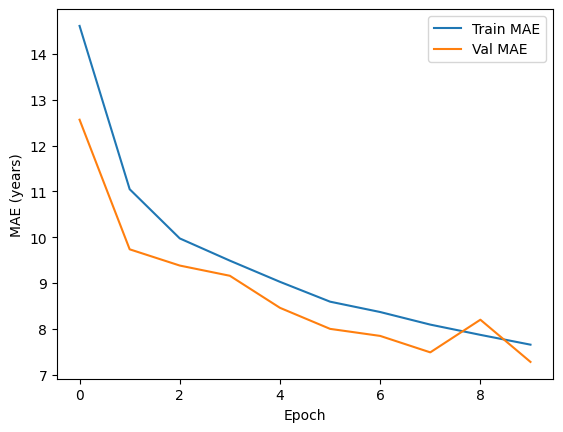

Age prediction model saved successfully.


NameError: name 'faces' is not defined

In [4]:
import os
import cv2
import numpy as np

# Update this to your actual UTKFace folder path
data_dir = r"C:\Users\harini p\OneDrive\Desktop\Drowsiness Detection\dataset\age\UTKFace"

images = []
ages = []

for img_name in os.listdir(data_dir):
    # Make sure it's a jpg file
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    try:
        # Extract age from filename (e.g., "24_1_2_...jpg" => age = 24)
        age = int(img_name.split('_')[0])
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip unreadable images

        img = cv2.resize(img, (64, 64))  # Adjust size as needed for your model
        images.append(img)
        ages.append(age)
    except Exception as e:
        print(f"Error processing {img_name}: {e}")

images = np.array(images, dtype=np.float32) / 255.0  # Normalize to [0, 1]
ages = np.array(ages, dtype=np.int32)

print("Loaded images:", images.shape)
print("Loaded ages:", ages.shape)
print("Example ages:", ages[:10])
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    images, ages, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))  # Regression output

from tensorflow.keras.losses import MeanSquaredError
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])

model.summary()
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)
import matplotlib.pyplot as plt

loss, mae = model.evaluate(X_val, y_val)
print(f"Validation MAE (years): {mae:.2f}")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (years)')
plt.legend()
plt.show()
model.save(r"C:\Users\harini p\OneDrive\Desktop\Drowsiness Detection\model\age_model.h5")
print("Age prediction model saved successfully.")


In [7]:
import cv2
from tensorflow.keras.models import load_model

# Load the age prediction model
age_model = load_model(r"C:\Users\harini p\OneDrive\Desktop\Drowsiness Detection\model\age_model.h5")

# Read the image (replace with your actual image or video frame variable)
frame = cv2.imread(r"C:\Users\harini p\OneDrive\Pictures\Camera imports\2025-02-14\1732083778849.jpg")
  # Or use a video frame in real-time

# Convert to grayscale as required by Haar Cascade
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# For each detected face, crop and predict age
for (x, y, w, h) in faces:
    face_img = frame[y:y+h, x:x+w]  # Use color image for age prediction
    age_face = cv2.resize(face_img, (64, 64))
    if age_face.ndim == 2:  # If grayscale, convert to BGR as needed
        age_face = cv2.cvtColor(age_face, cv2.COLOR_GRAY2BGR)
    age_face_norm = age_face.reshape(1, 64, 64, 3) / 255.0
    pred_age = int(age_model.predict(age_face_norm)[0][0])
    print("Predicted age:", pred_age)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted age: 37
